In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import csv
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
backcall            0.2.0
cffi                1.14.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.34.0
louvain             0.7.0
matplotlib          3.3.1
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.2
numexpr             2.7.1
numpy               1.19.2
packaging           20.4
pandas              1.1.2
parso               0.7.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.7
ptyprocess          0.6.0
pygment

In [2]:
batch_corrected_umap_rank_all_genes = sc.read('/scratch/batch_corrected_umap.h5ad')
batch_corrected_umap_rank_selected_genes = sc.read('/scratch/batch_corrected_umap.h5ad')
uncorrected_umap_rank_all_genes = sc.read('/scratch/uncorrected_umap.h5ad')
uncorrected_umap_rank_selected_genes = sc.read('/scratch/uncorrected_umap.h5ad')

# Batch-corrected UMAP

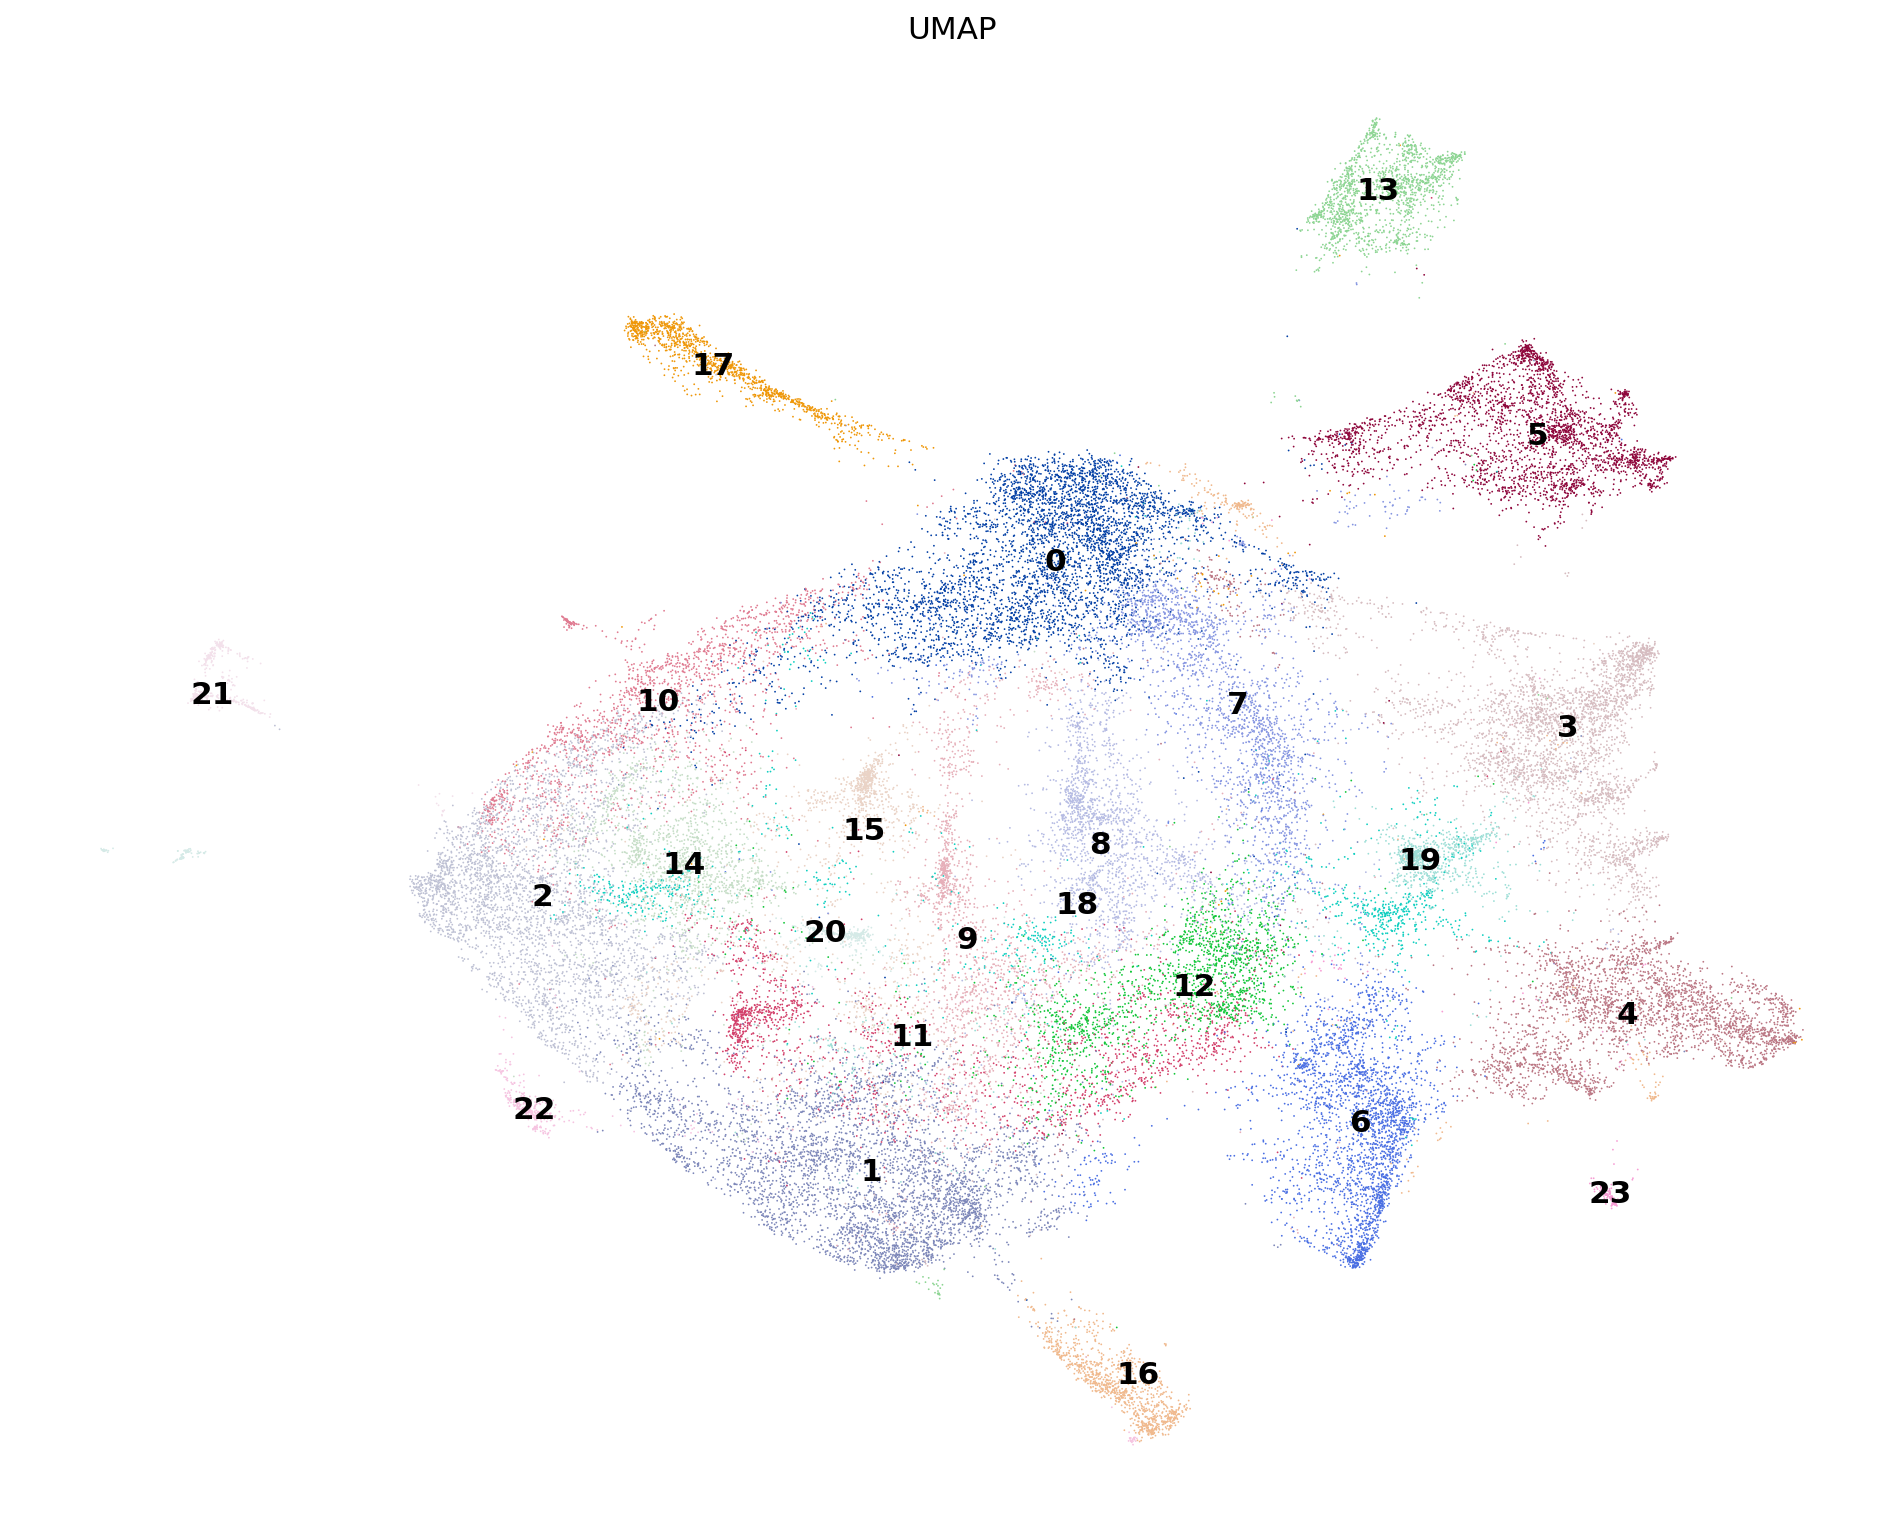

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
sc.pl.umap(batch_corrected_umap_rank_all_genes, color='leiden', title='UMAP', legend_loc='on data',frameon=False,ax=ax)

### Differential expression on all genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:17)


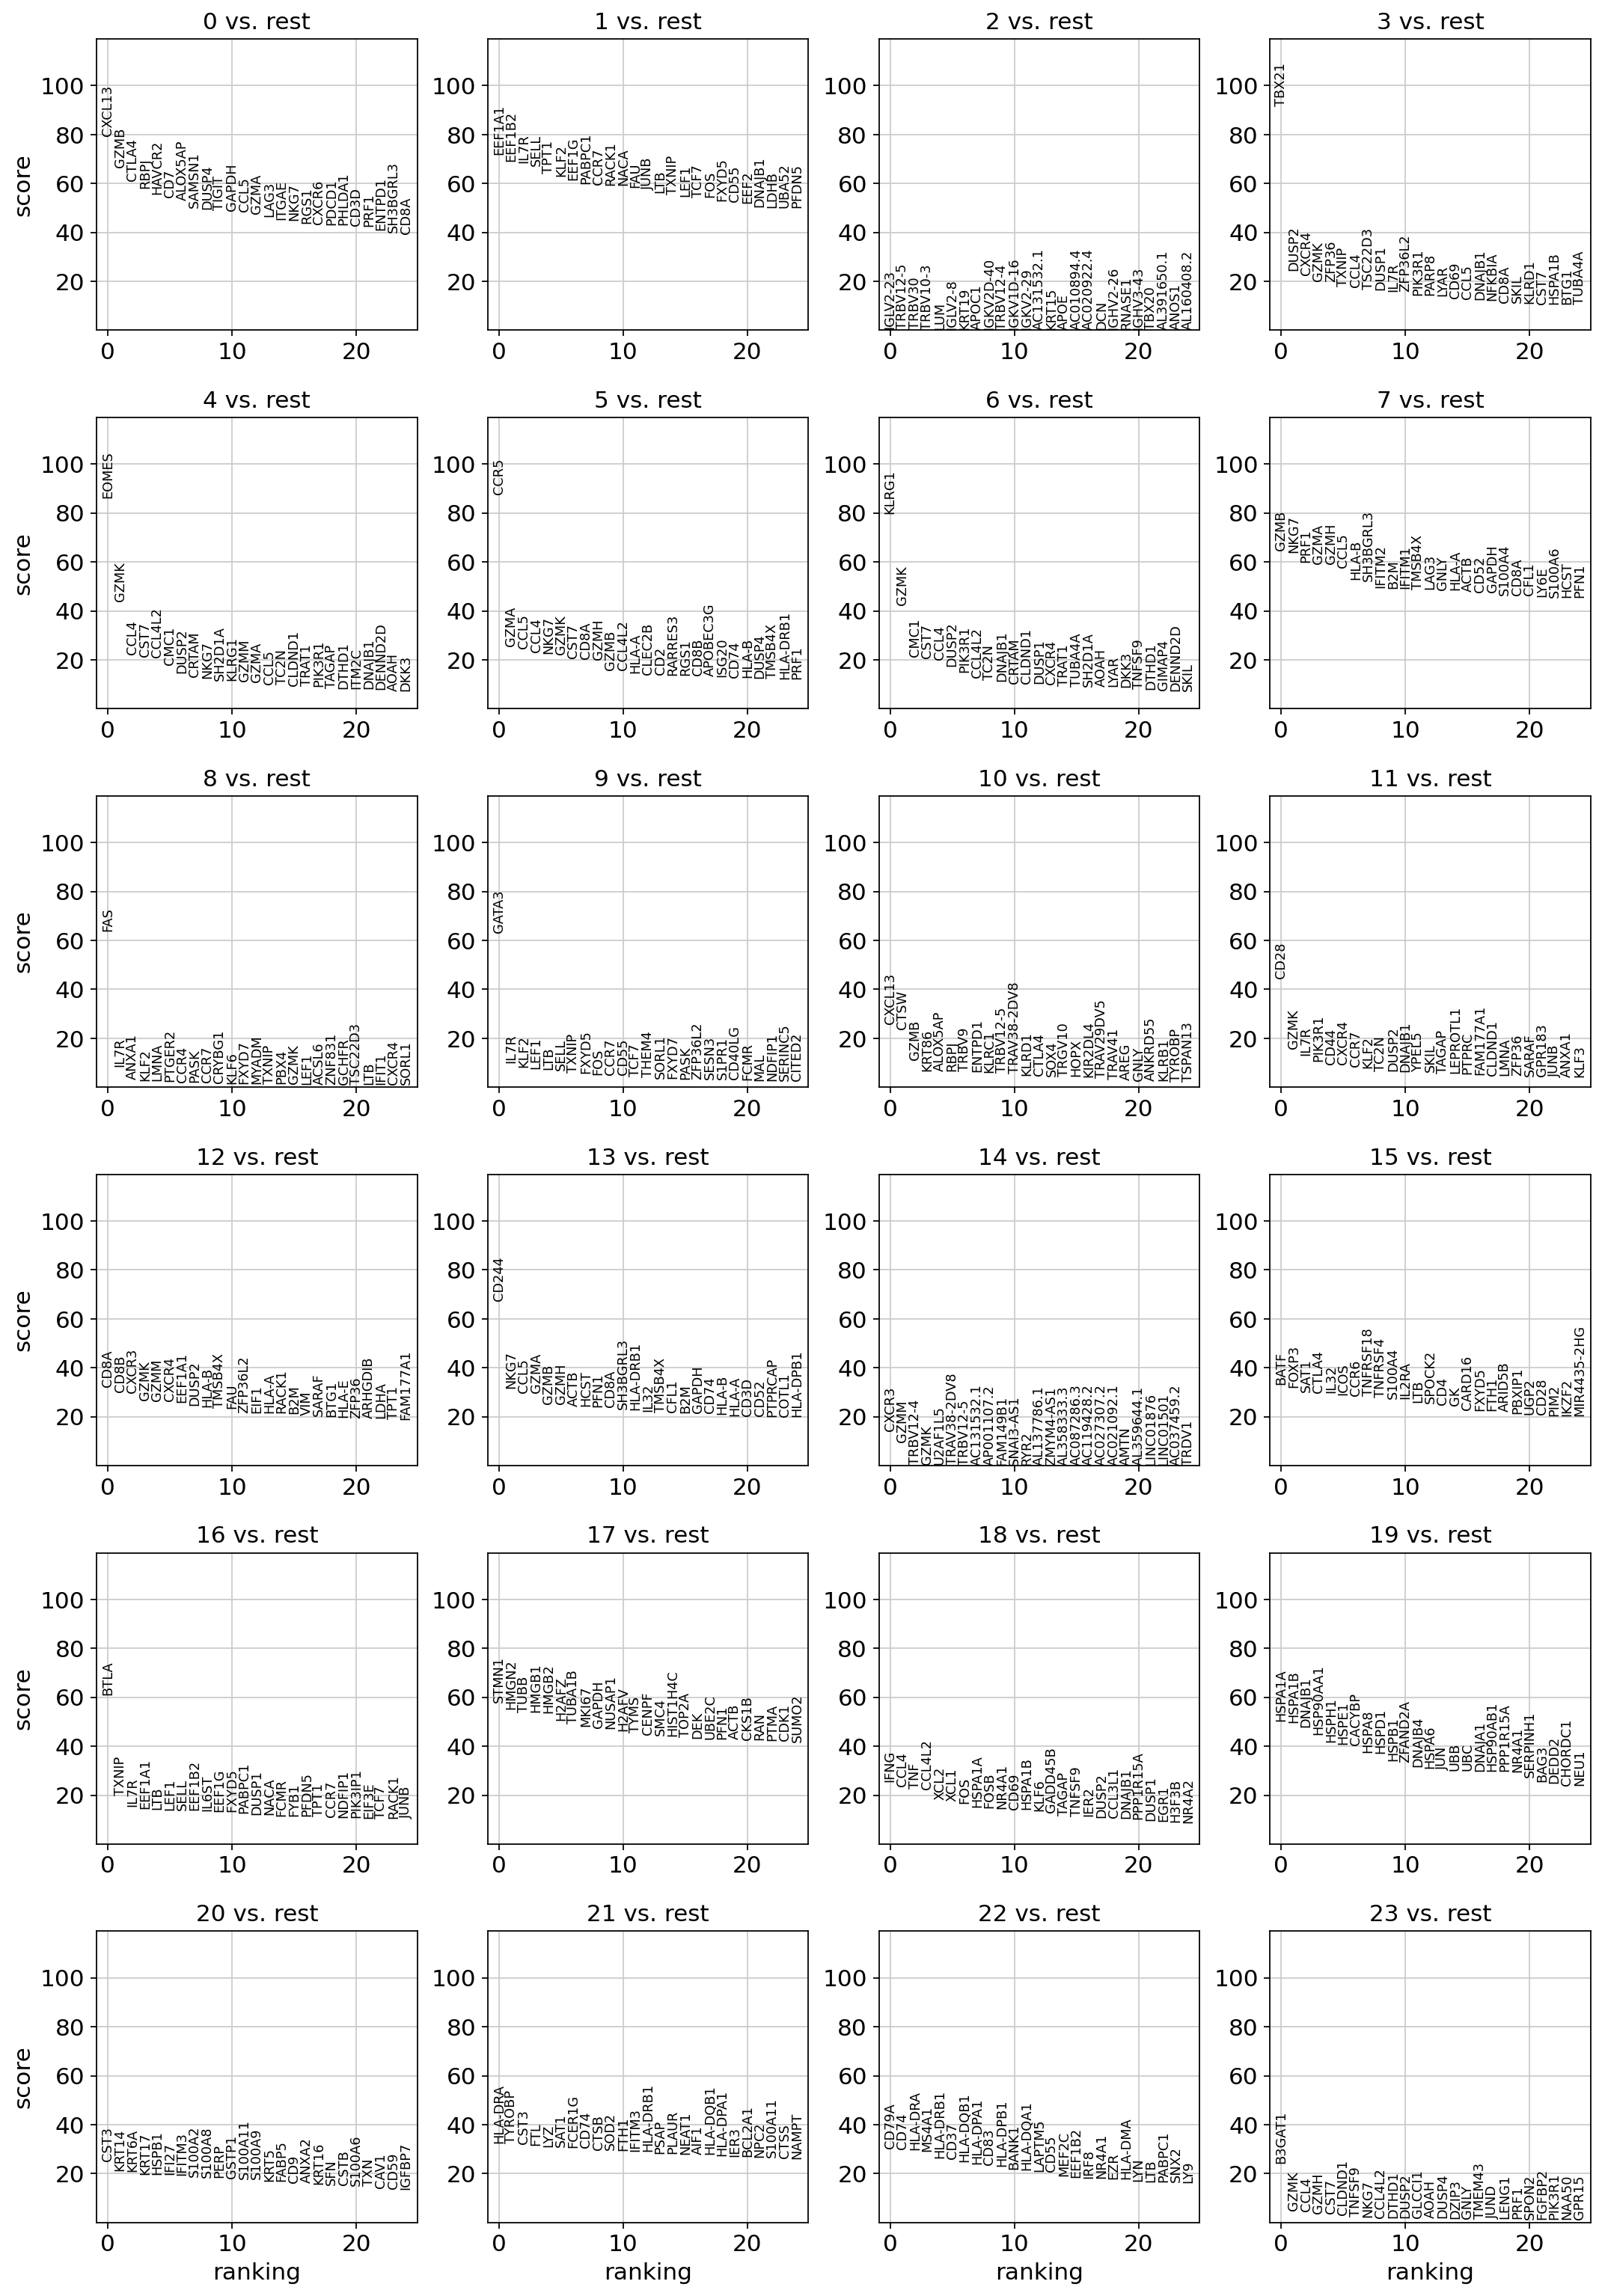

In [4]:
# find marker genes
sc.tl.rank_genes_groups(batch_corrected_umap_rank_all_genes, groupby='leiden',method='wilcoxon',use_faw=True)
sc.pl.rank_genes_groups(batch_corrected_umap_rank_all_genes,n_genes=25,use_raw=True)

In [5]:
cluster_marker_gene_file = '/scratch/cluster_genes_all.csv'
cluster_sizes = []
for i in range(len(set(batch_corrected_umap_rank_all_genes.obs['leiden']))):
    cluster_sizes.append(sum(batch_corrected_umap_rank_all_genes.obs['leiden']==str(i)))
    with open(cluster_marker_gene_file, 'a') as file:
        file_writer = csv.writer(file)
        file_writer.writerow(['Cluster'+str(i)+':',cluster_sizes[-1]])
        file_writer.writerow(batch_corrected_umap_rank_all_genes.uns['rank_genes_groups']['names'][str(i)][:30])
        file_writer.writerow(batch_corrected_umap_rank_all_genes.uns['rank_genes_groups']['logfoldchanges'][str(i)][:30])

#### Differential expression on selected genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


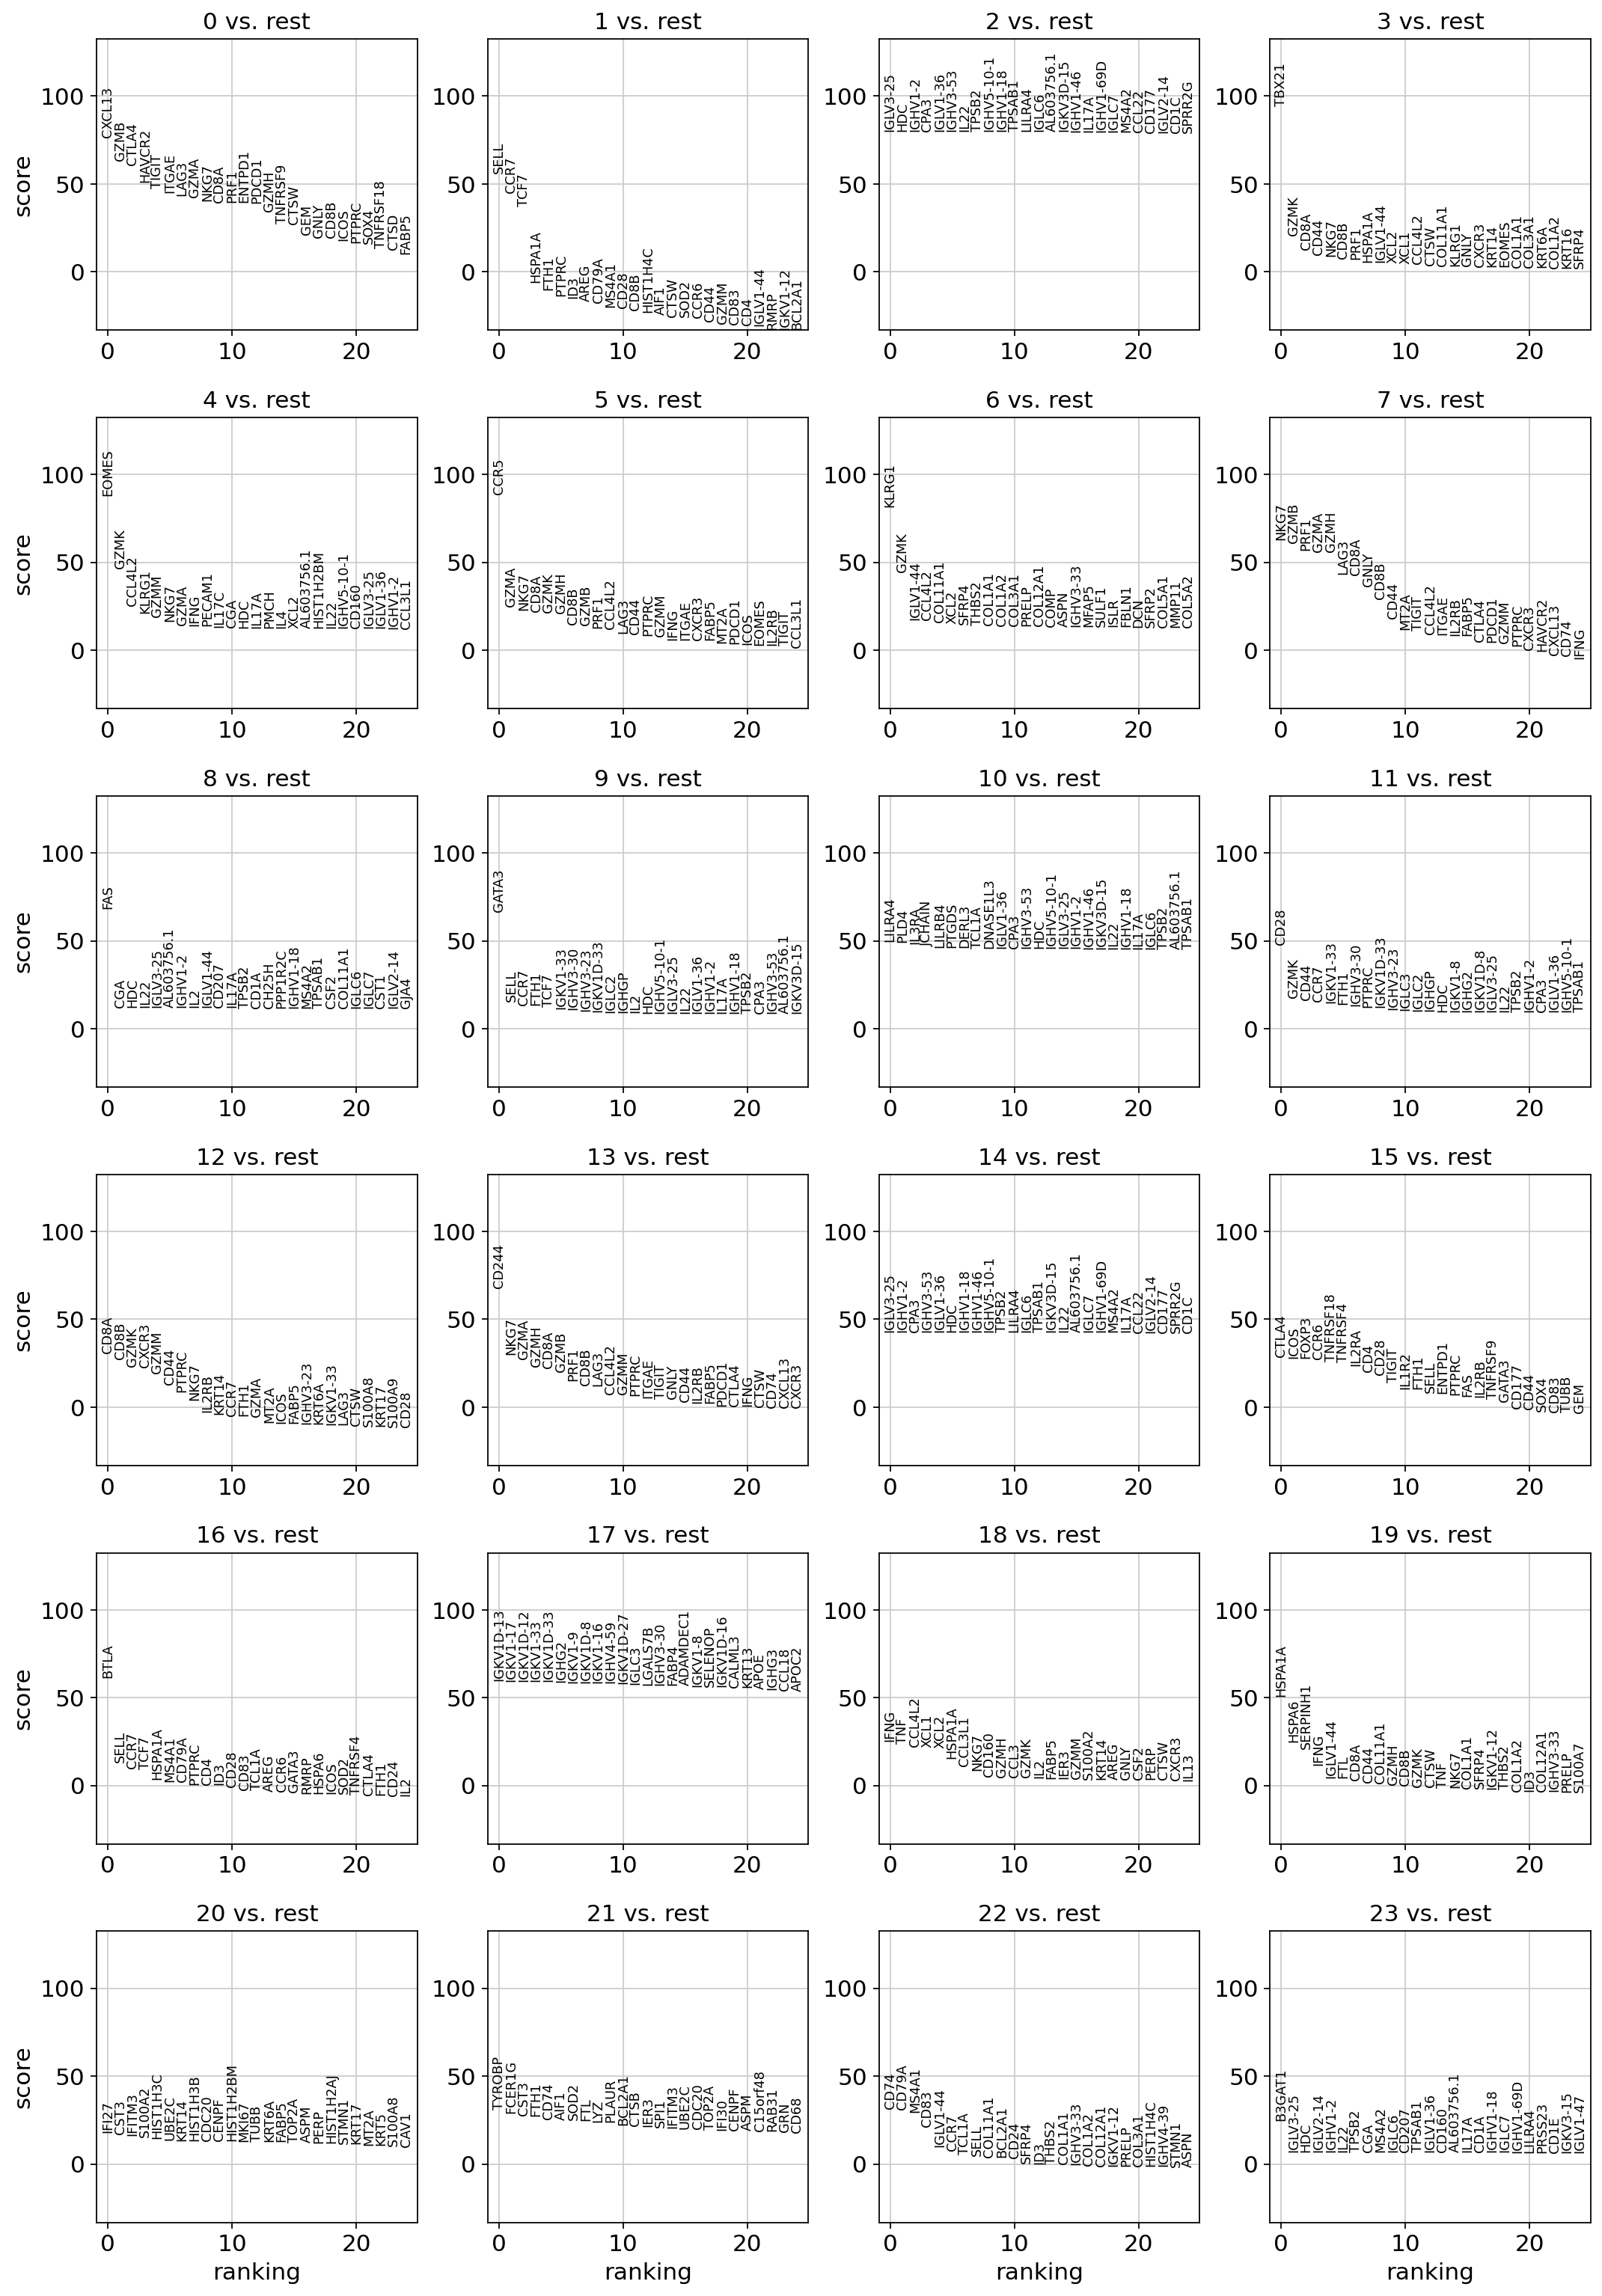

In [6]:
sc.tl.rank_genes_groups(batch_corrected_umap_rank_selected_genes, groupby='leiden',method='wilcoxon',use_raw=False)
sc.pl.rank_genes_groups(batch_corrected_umap_rank_selected_genes, n_genes=25,use_raw=False)

In [7]:
cluster_marker_gene_file = '/scratch/cluster_genes_selected.csv'
cluster_sizes = []
for i in range(len(set(batch_corrected_umap_rank_selected_genes.obs['leiden']))):
    cluster_sizes.append(sum(batch_corrected_umap_rank_selected_genes.obs['leiden']==str(i)))
    with open(cluster_marker_gene_file, 'a') as file:
        file_writer = csv.writer(file)
        file_writer.writerow(['Cluster'+str(i)+':',cluster_sizes[-1]])
        file_writer.writerow(batch_corrected_umap_rank_selected_genes.uns['rank_genes_groups']['names'][str(i)][:30])
        file_writer.writerow(batch_corrected_umap_rank_selected_genes.uns['rank_genes_groups']['logfoldchanges'][str(i)][:30])

# Uncorrected UMAP

In [6]:
# add annotations 
#ann = ['Late-dysfunctional T','Eff T','Stem-like T','Non T','Mem T','Antigen-exp T', 'Act T','React mem T',
#        'Treg','ACID T','Pre-dysfunc T','Early-activated T','Cyt T','Th1','early activated T','Non T','IFN T',
#        'Late-dysfunctional T','High HLA+ T','High Cla2 T','Tfh','Act T','B','Cyt T','Prolif','26','MAIT T','NK',
#        '29','30','31','32','Myeloid','34','Cyt T','36','Senesc T/NK','38','39','NK','Eff CD4','42','43',
#        'Epithelial','45','46','47','48','pDC','Naive B']
#temp = {}
#for i in range(len(ann)):
#    temp[str(i)]=ann[i]
#ann=temp

#temp = []
#for clus in uncorrected_umap_rank_all_genes.obs['leiden']:
#    temp.append(ann[clus])
#uncorrected_umap_rank_all_genes.obs['leiden'] = temp

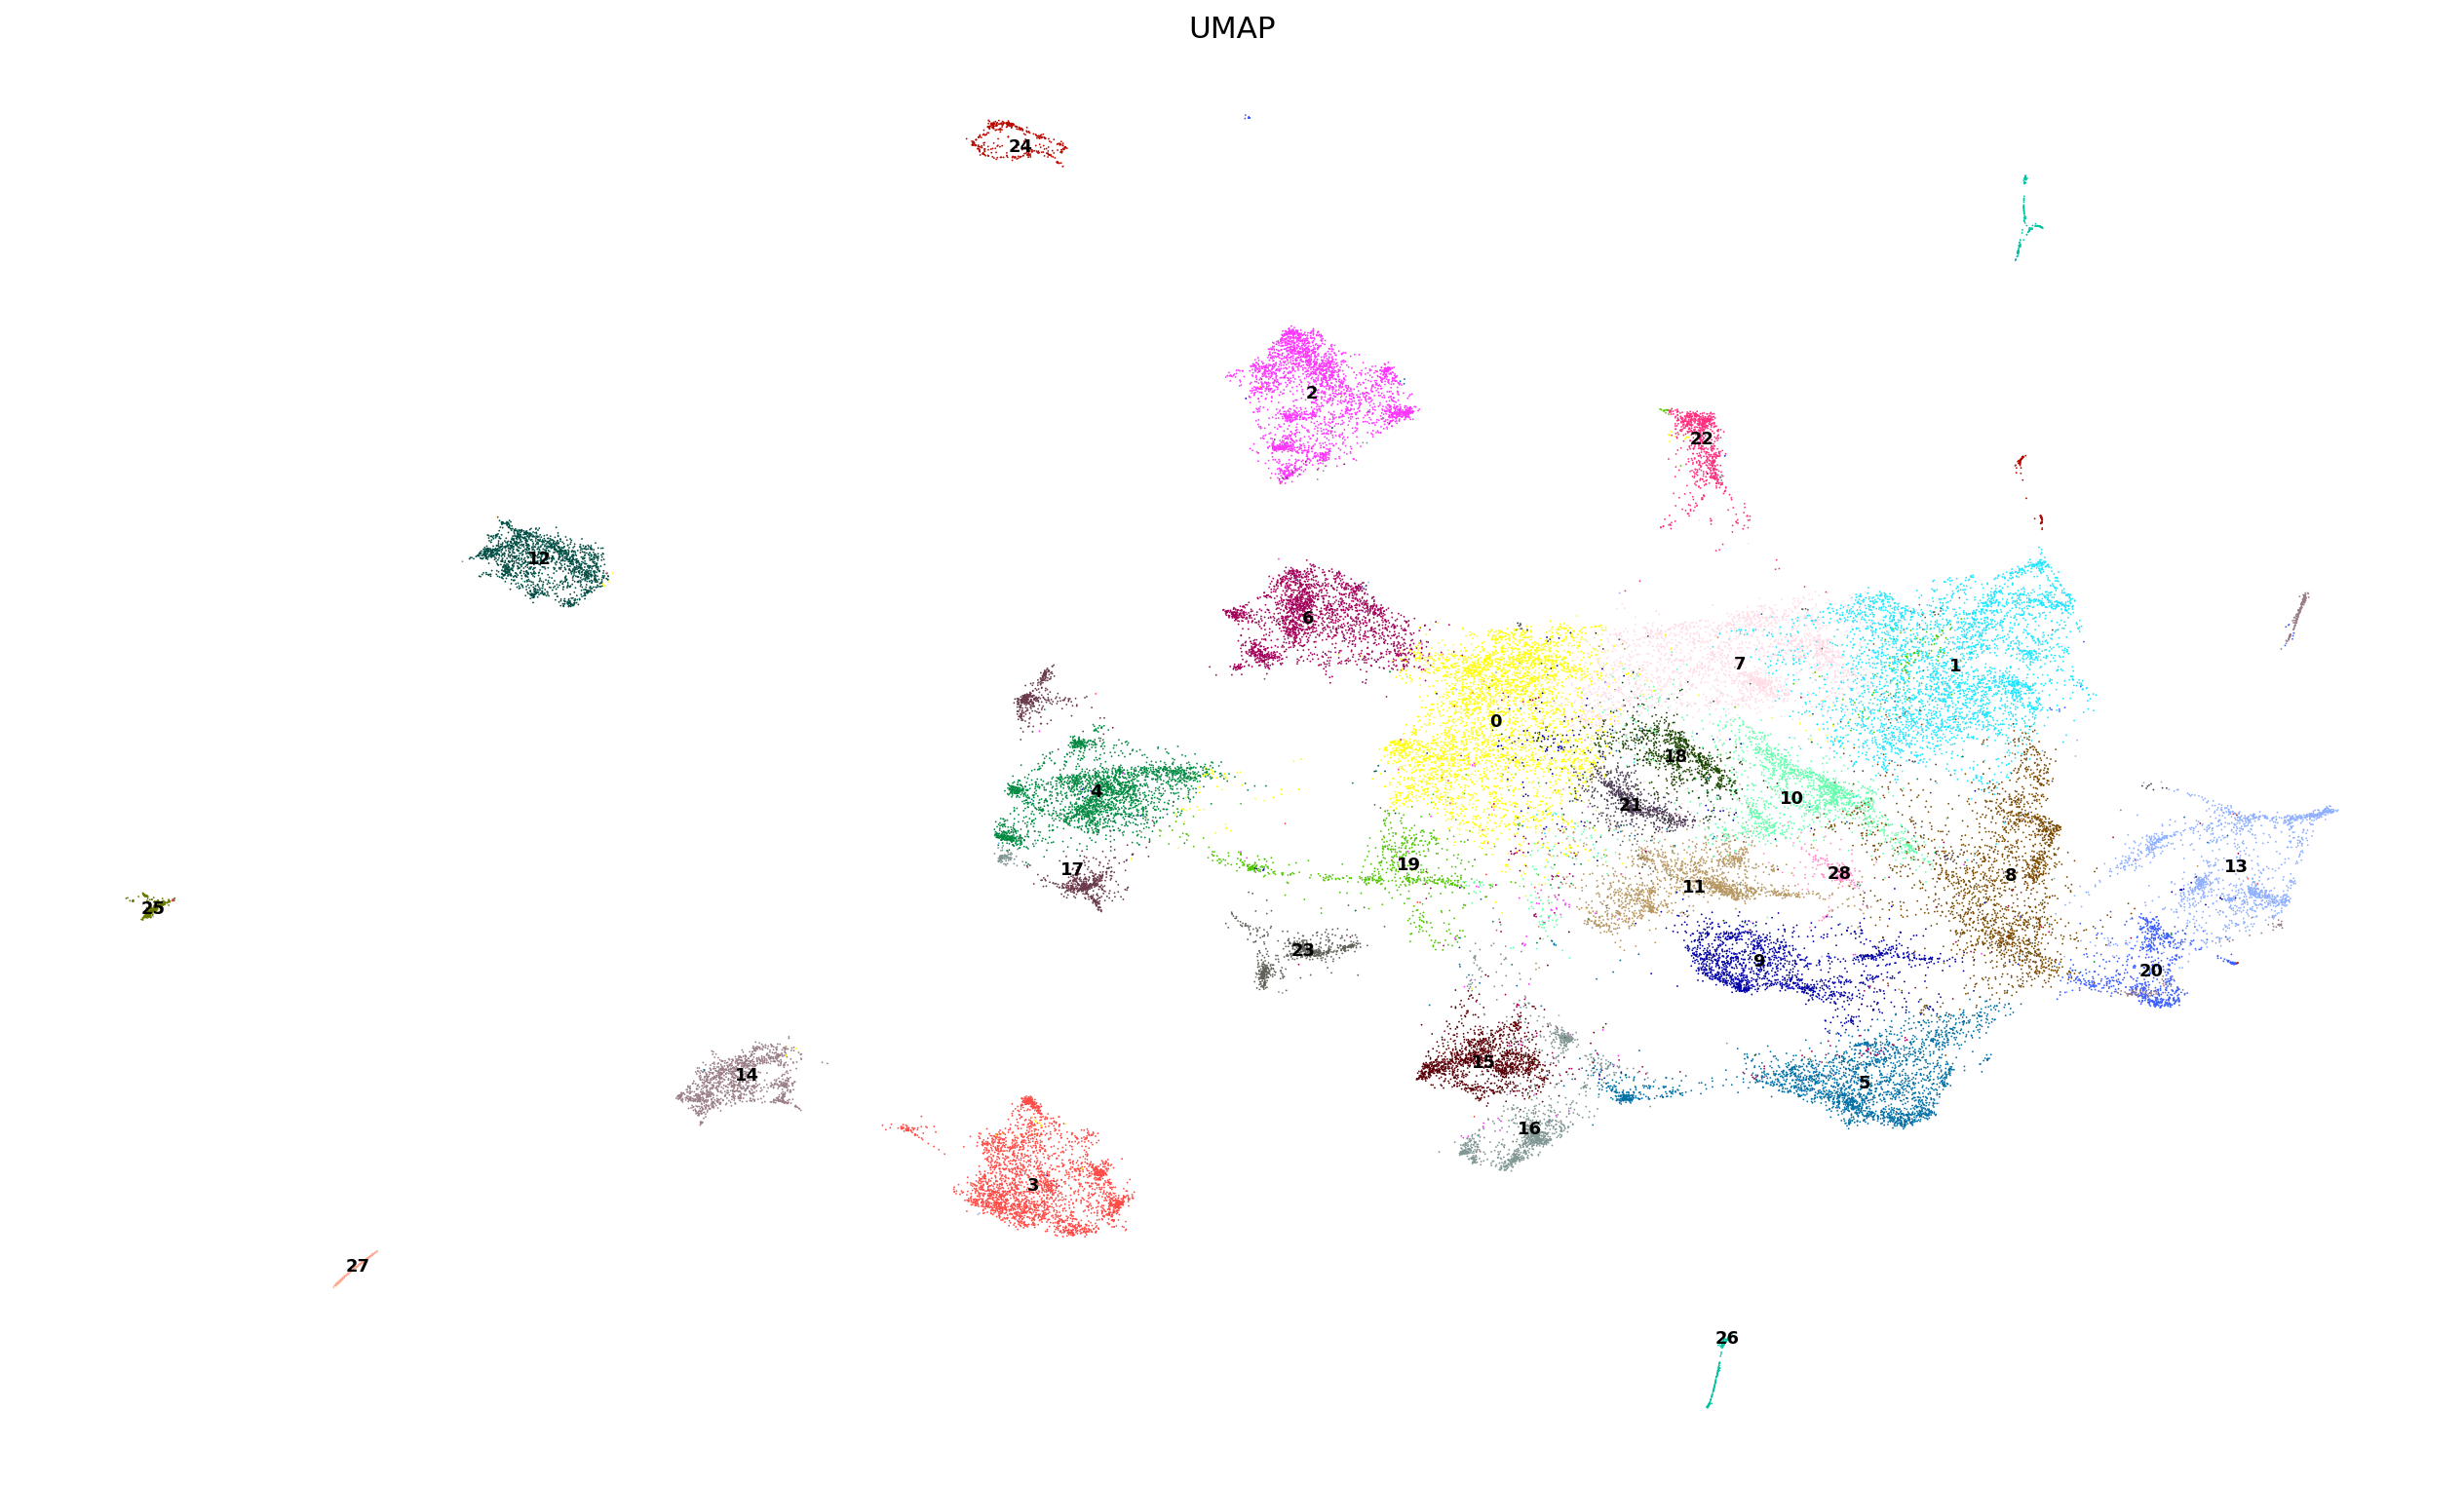

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
sc.pl.umap(uncorrected_umap_rank_all_genes, color='leiden', title='UMAP', legend_loc='on data',legend_fontsize='xx-small',frameon=False,ax=ax)

# Identifying the clusters

### Differential expression on all genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:16)


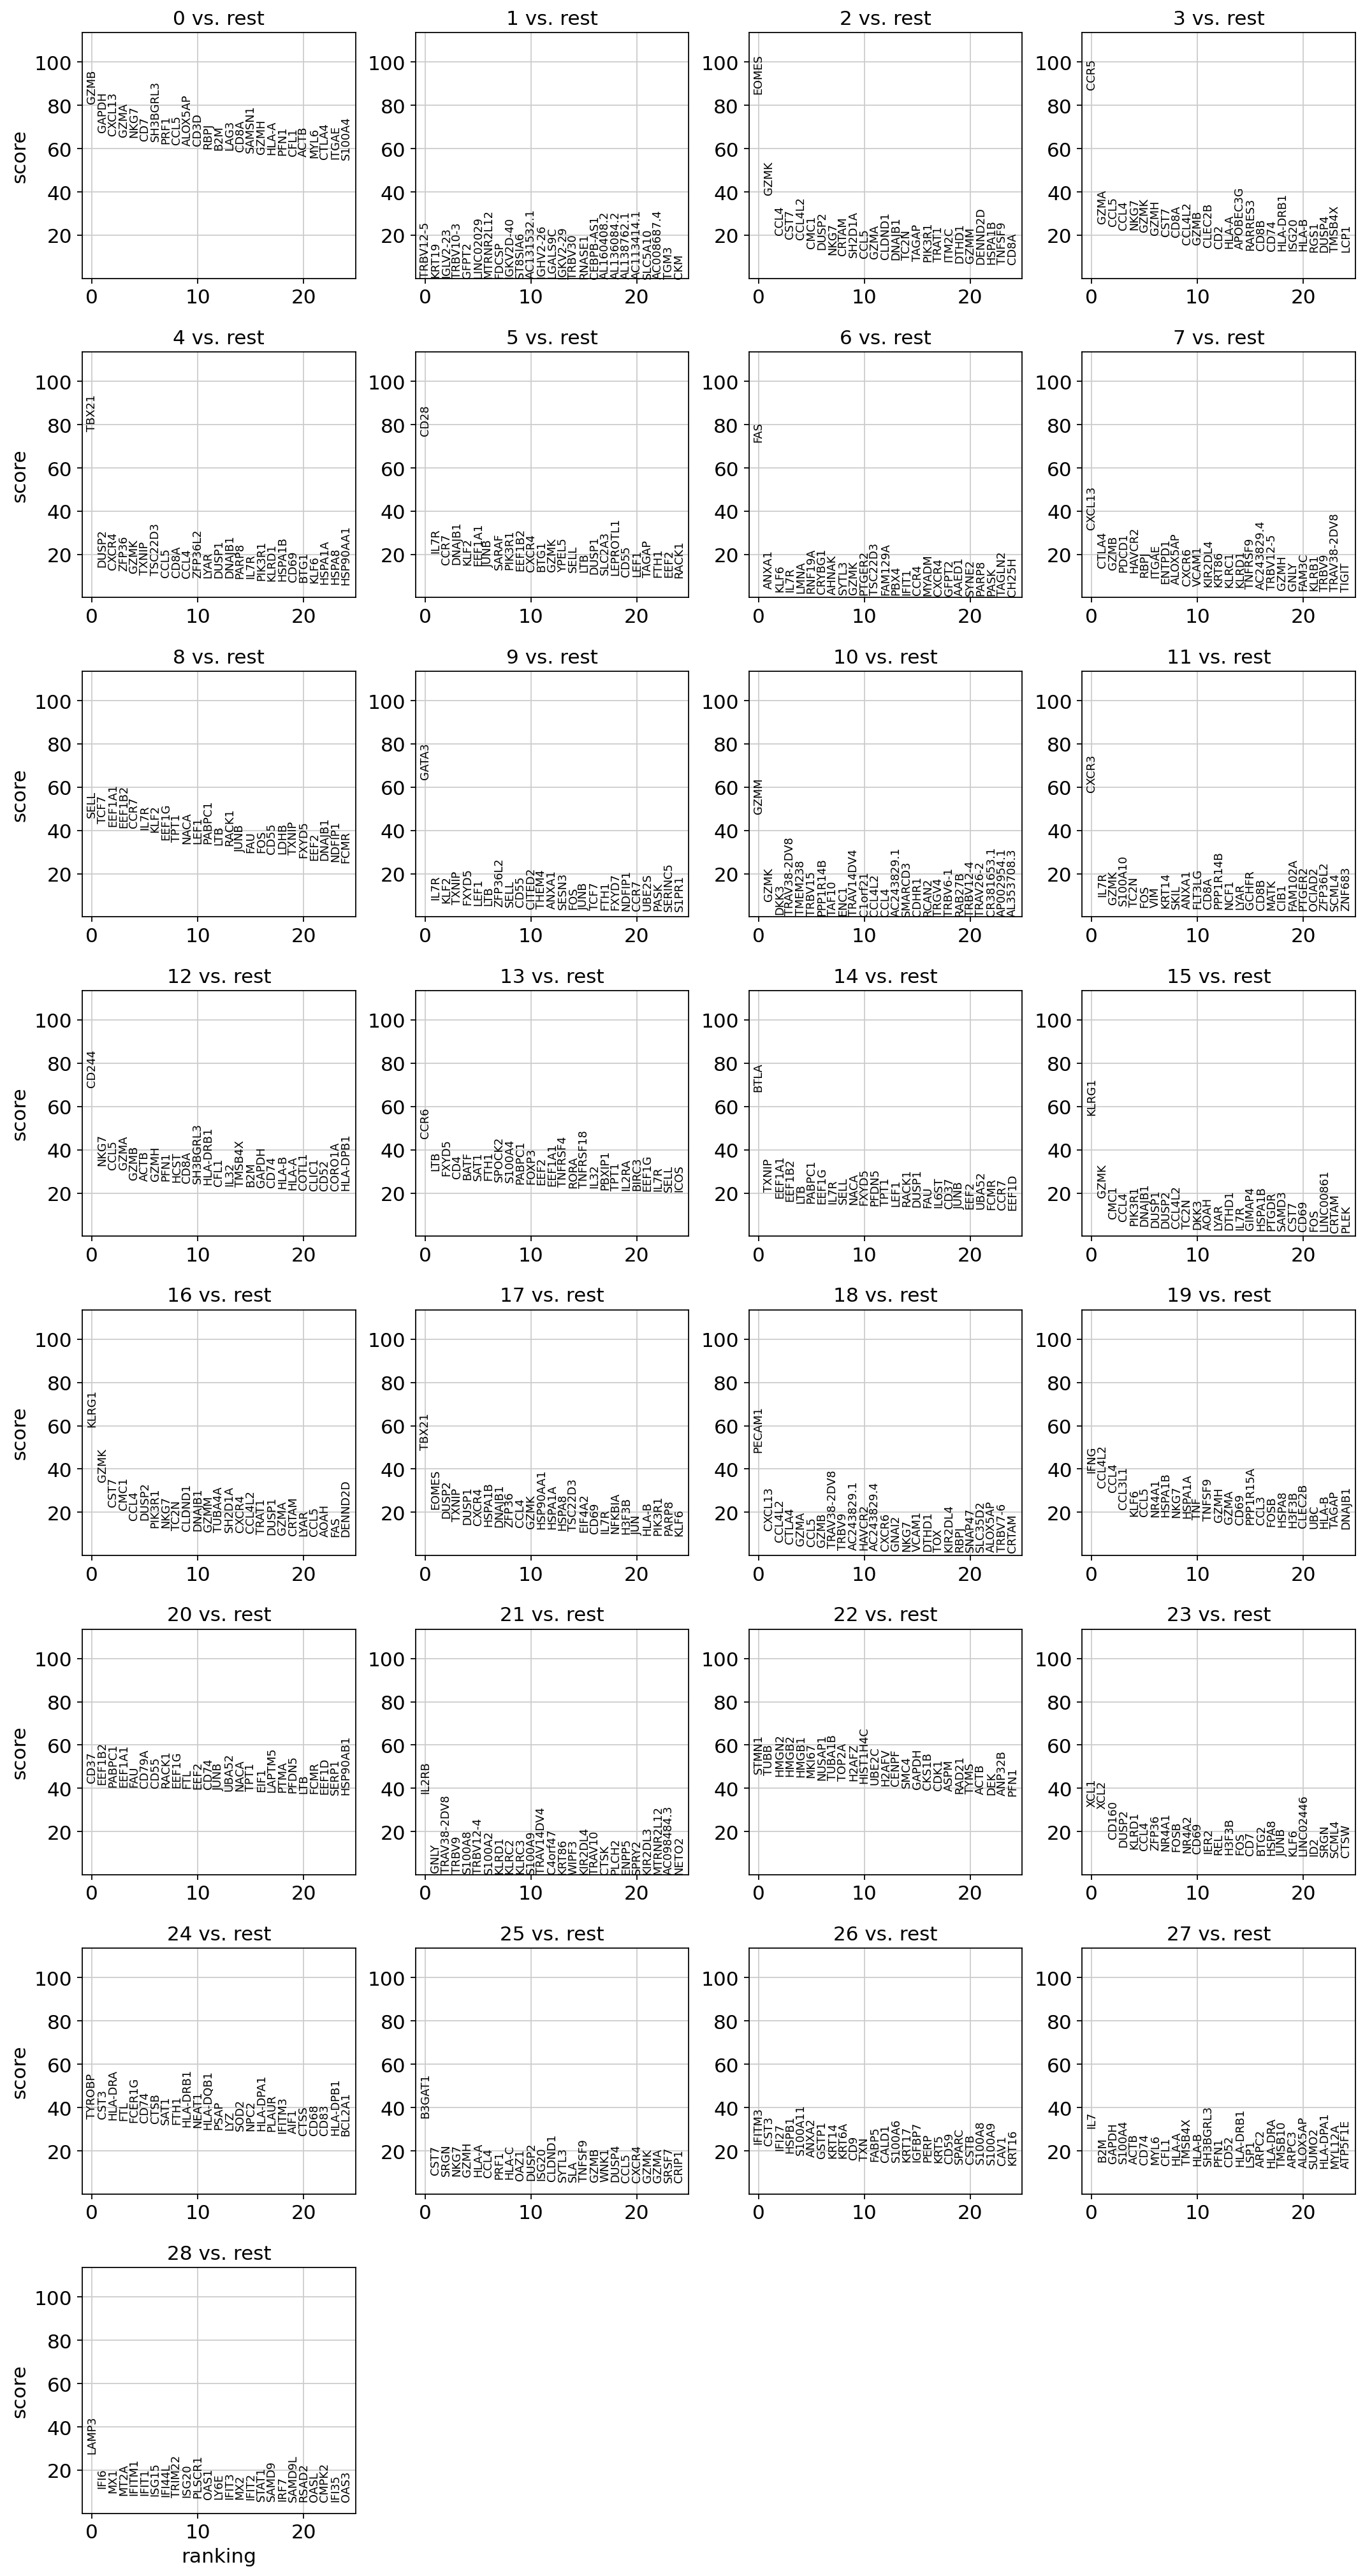

In [8]:
# find marker genes
sc.tl.rank_genes_groups(uncorrected_umap_rank_all_genes, groupby='leiden',method='wilcoxon',use_faw=True)
sc.pl.rank_genes_groups(uncorrected_umap_rank_all_genes,n_genes=25,use_raw=True)

In [9]:
# make sure we get what we are supposed to get
uncorrected_umap_rank_all_genes.uns['rank_genes_groups']['params']['use_raw']

True

In [14]:
cluster_marker_gene_file = '/scratch/cluster_genes_all.csv'
cluster_sizes = []
for i in range(len(set(uncorrected_umap_rank_all_genes.obs['leiden']))):
    cluster_sizes.append(sum(uncorrected_umap_rank_all_genes.obs['leiden']==str(i)))
    with open(cluster_marker_gene_file, 'a') as file:
        file_writer = csv.writer(file)
        file_writer.writerow(['Cluster'+str(i)+':',cluster_sizes[-1]])
        file_writer.writerow(uncorrected_umap_rank_all_genes.uns['rank_genes_groups']['names'][str(i)][:30])
        file_writer.writerow(uncorrected_umap_rank_all_genes.uns['rank_genes_groups']['logfoldchanges'][str(i)][:30])

### Differential Expression on highly variable genes plus chosen marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


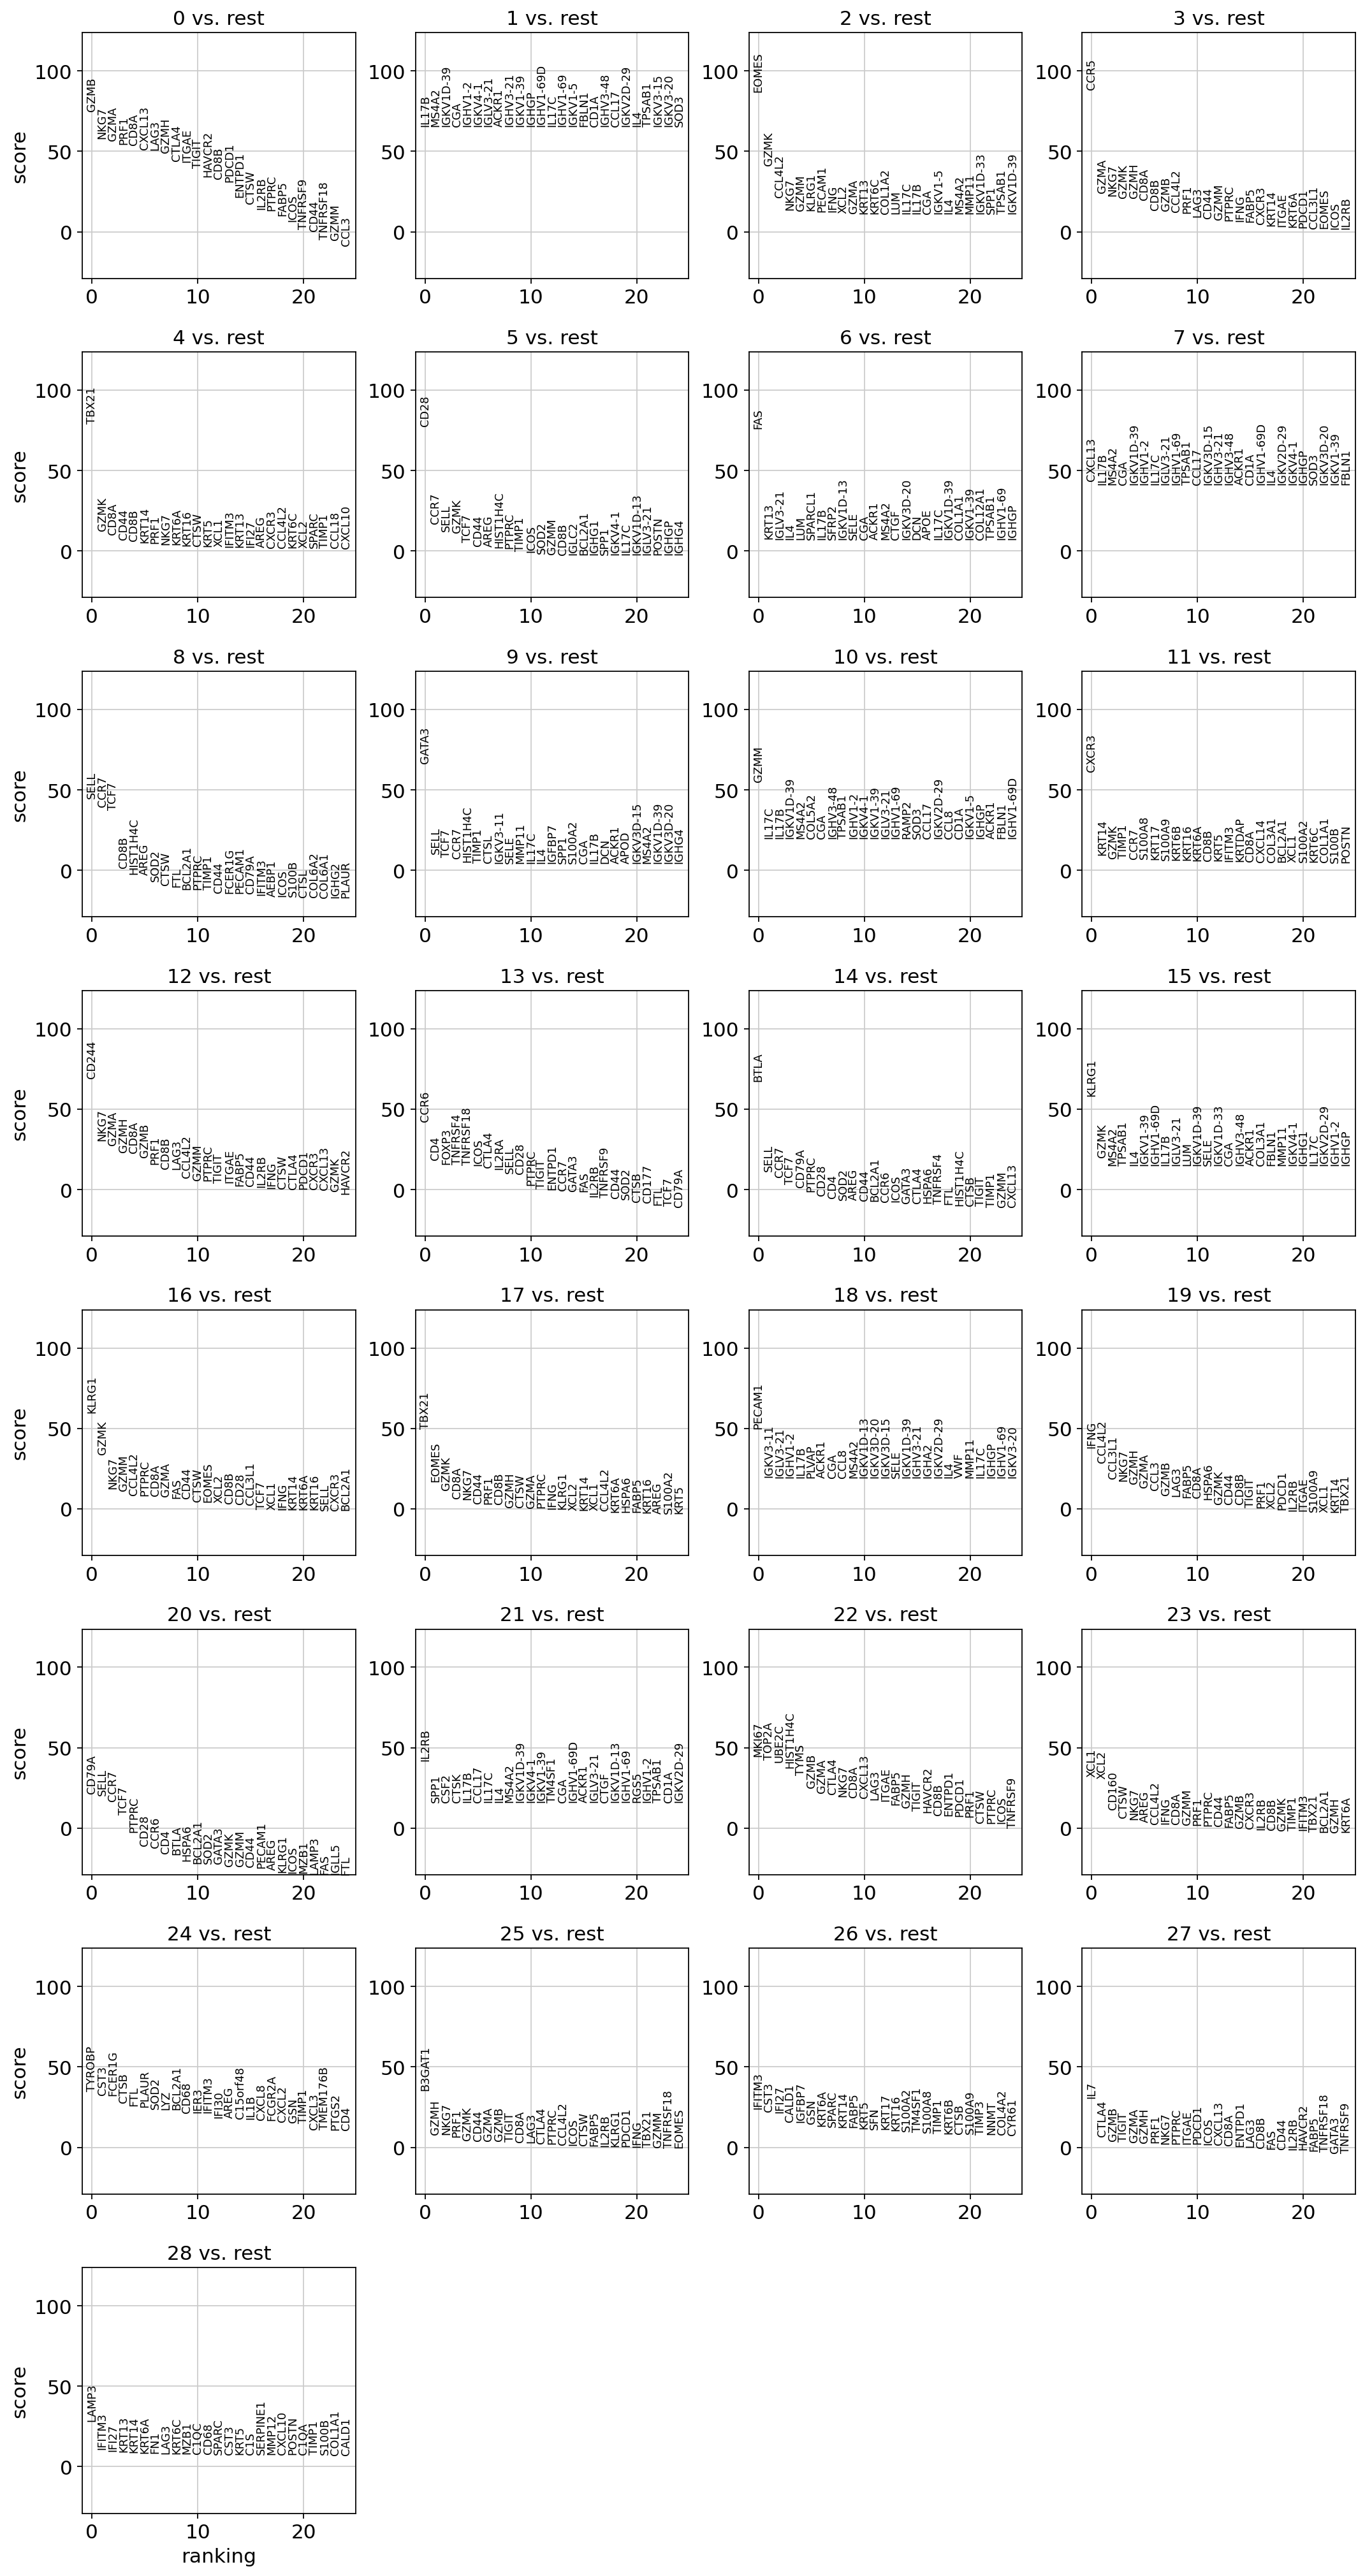

In [11]:
sc.tl.rank_genes_groups(uncorrected_umap_rank_selected_genes, groupby='leiden',method='wilcoxon',use_raw=False)
sc.pl.rank_genes_groups(uncorrected_umap_rank_selected_genes, n_genes=25,use_raw=False)

In [12]:
# make sure we get what we are supposed to get
uncorrected_umap_rank_selected_genes.uns['rank_genes_groups']['params']['use_raw']

False

In [15]:
cluster_marker_gene_file = '/scratch/cluster_genes_selected.csv'
cluster_sizes = []
for i in range(len(set(uncorrected_umap_rank_selected_genes.obs['leiden']))):
    cluster_sizes.append(sum(uncorrected_umap_rank_selected_genes.obs['leiden']==str(i)))
    with open(cluster_marker_gene_file, 'a') as file:
        file_writer = csv.writer(file)
        file_writer.writerow(['Cluster'+str(i)+':',cluster_sizes[-1]])
        file_writer.writerow(uncorrected_umap_rank_selected_genes.uns['rank_genes_groups']['names'][str(i)][:30])
        file_writer.writerow(uncorrected_umap_rank_selected_genes.uns['rank_genes_groups']['logfoldchanges'][str(i)][:30])